In [618]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spread(LoA, xlims, ylims):
    
    def label_asset(x):
        return x[0]+'-'+x[1]+'-'+str(x[2])+'@'+str(x[3])
    
    num_colors = len(LoA)
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    clrs = sns.color_palette('husl', n_colors=num_colors)
    plt.xticks([i[2] for i in LoA])
    yticks = [0]
    
    max_strike = max([i[2] for i in LoA])
    price_floor = np.arange(0,max_strike*2, .01)
    profit = np.zeros(len(price_floor))
    for i in range(len(LoA)):
        order_type = LoA[i][0] ; CP = LoA[i][1]
        strike = LoA[i][2] ; premium = LoA[i][3]
        
        if order_type == 'L' and CP == 'C':
            x1 = np.linspace(0,strike,1000) ; x2 = np.linspace(strike,2*max_strike,1000)
            y1 = [-premium for i in x1] ; y2 = [i-strike-premium for i in x2]
            payoff1 = [-premium if i < strike else 0 for i in price_floor]
            payoff2 = [i-strike-premium if i >= strike else 0 for i in price_floor]
            yticks.append(-premium)
        elif order_type == 'L' and CP == 'P':
            x1 = np.linspace(0,strike,1000) ; x2 = np.linspace(strike, 2*max_strike,1000)
            y1 = [-1*i+strike-premium for i in x1] ; y2 = [-premium for i in x2]
            payoff1 = [-1*i+strike-premium if i < strike else 0 for i in price_floor]
            payoff2 = [-premium if i >= strike else 0for i in price_floor]
            yticks.append(-premium)
        elif order_type == 'S' and CP == 'C':
            x1 = np.linspace(0,strike,1000) ; x2 = np.linspace(strike, 2*max_strike,1000)
            y1 = [premium for i in x1] ; y2 = [-i+strike+premium for i in x2]
            payoff1 = [premium if i < strike else 0 for i in price_floor]
            payoff2 = [-i+strike+premium if i >= strike else 0 for i in price_floor]
            yticks.append(premium)
        elif order_type == 'S' and CP == 'P':
            x1 = np.linspace(0,strike,1000) ; x2 = np.linspace(strike, 2*max_strike,1000)
            y1 = [i-strike+premium for i in x1] ; y2 = [premium for i in x2]
            payoff1 = [i-strike+premium if i < strike else 0 for i in price_floor]
            payoff2 = [premium if i >= strike else 0 for i in price_floor]
            yticks.append(premium)
                
        plt.plot(x1, y1, color = clrs[i], linewidth = 3, alpha = .8, label = label_asset(LoA[i]))
        plt.plot(x2, y2, color = clrs[i], linewidth = 3, alpha = .8, label = label_asset(LoA[i]))
        profit += np.array(payoff1) + np.array(payoff2)
    
    plt.plot(price_floor, profit, color = 'k', linewidth = 3, label = 'Portfolio')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.xlabel('S(T)')
    plt.ylabel('Payoff')
    plt.yticks(yticks)
    plt.legend(by_label.values(), by_label.keys())
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

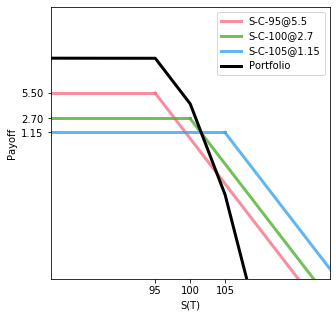

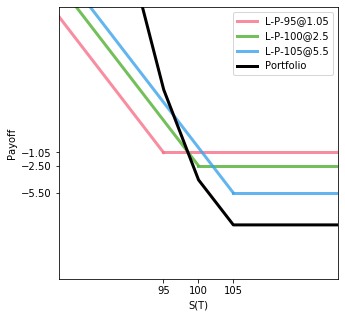

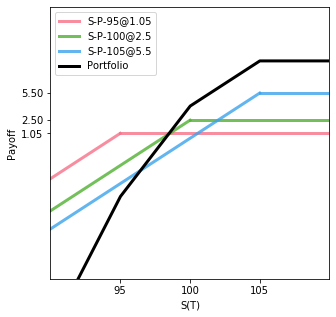

In [605]:
# Exercise 1.2

p1 = [['S', 'C', 95, 5.50], ['S', 'C', 100, 2.70], ['S', 'C', 105, 1.15]]
p2 = [['L', 'P', 95, 1.05], ['L', 'P', 100, 2.50], ['L', 'P', 105, 5.50]]
p3 = [['S', 'P', 95, 1.05], ['S', 'P', 100, 2.50], ['S', 'P', 105, 5.50]]

plot_spread(p1, [80, 120], [-15,15])
plot_spread(p2, [80, 120], [-15,15])
plot_spread(p3, [90, 110], [-15,15])

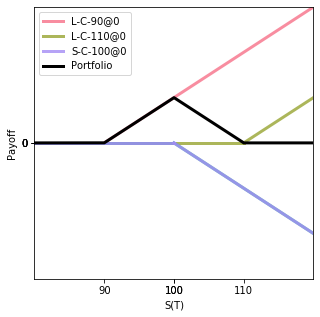

In [606]:
# Excersice 1.6

butterfly = [['L','C',90,0],['L','C',110,0],
            ['S','C',100,0],['S','C',100,0]]

plot_spread(butterfly, [80, 120], [-30,30])

Payoff Diagram of straddle spread


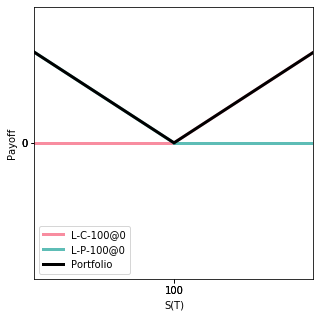

Profit Diagram of straddle spread


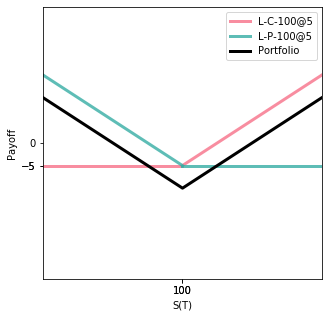

In [626]:
# Exercise 1.7

straddle_payoff = [['L','C',100,0],['L','P',100,0]]
print("Payoff Diagram of straddle spread")
plot_spread(straddle_payoff, [80, 120], [-30,30])

straddle_profit = [['L','C',100,5],['L','P',100,5]]
print("Profit Diagram of straddle spread")
plot_spread(straddle_profit, [80, 120], [-30,30])